In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

sept2013c3 = pd.read_csv('sept2013c3.csv')

In [3]:
def check_incomplete_rows(df, dataset_name):
    total_rows = df.shape[0]
    incomplete_rows = df.isnull().sum().sum()
    incomplete_count = df.isnull().any(axis=1).sum()
    
    print(f"--- {dataset_name} ---")
    print(f"Total Rows: {total_rows}")
    print(f"Incomplete Rows (any NaN): {incomplete_count}")
    print(f"Total NaN Values: {incomplete_rows}")
    print("----------------------------------------------------")

In [ ]:
check_incomplete_rows(sept2013c3, 'sept2013c3')

print("\n--- Transaction Data Statistical Summary ---")
print(sept2013c3.describe())

print("\n--- Data Types ---")
print(sept2013c3.dtypes)

print("\n--- Class Distribution ---")
print(sept2013c3['Class'].value_counts(normalize=True))

--- sept2013c3 ---
Total Rows: 284807
Incomplete Rows (any NaN): 0
Total NaN Values: 0
----------------------------------------------------

--- Transaction Data Statistical Summary ---
                 V1            V2            V3            V4            V5  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15  9.604066e-16   
std    1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00  1.380247e+00   
min   -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00 -1.137433e+02   
25%   -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01 -6.915971e-01   
50%    1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02 -5.433583e-02   
75%    1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01  6.119264e-01   
max    2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01  3.480167e+01   

                 V6            V7            V8            V9           V10  \
count  2.848070e+05  2.


--- Correlation Matrix ---


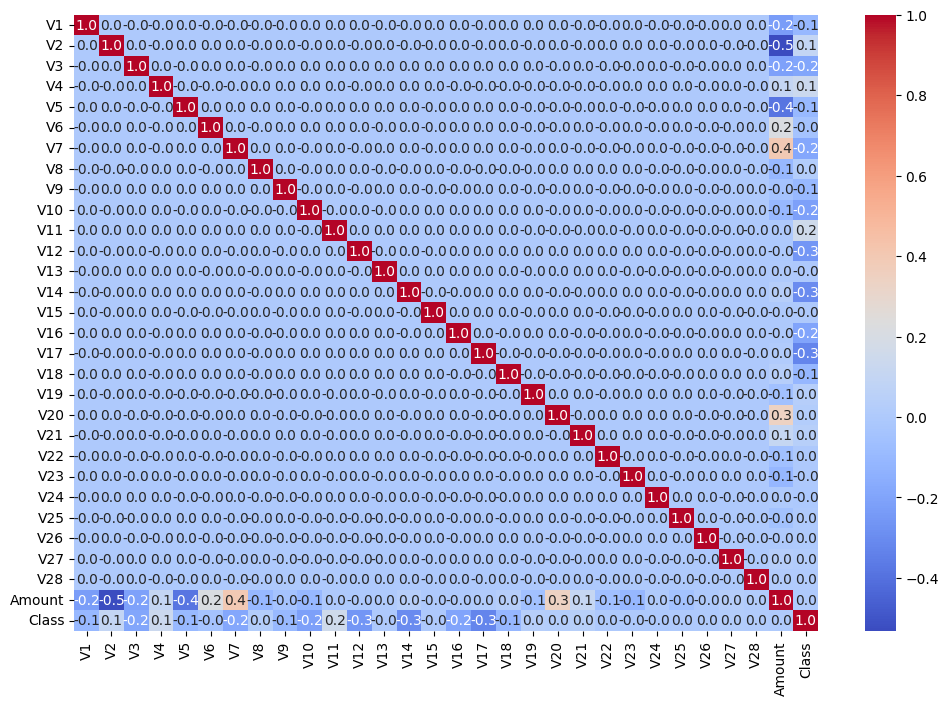

In [ ]:
correlation_matrix = sept2013c3.corr()

# Display the correlation matrix
print("\n--- Correlation Matrix ---")
# print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', cbar=True)
plt.title("")
plt.show()


In [ ]:
X = sept2013c3.drop(columns=['Class'])
y = sept2013c3['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy=.25, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

under_sampler = RandomUnderSampler(sampling_strategy=.3, random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_resampled, y_resampled)

print(f"Original class distribution in y_train: {pd.Series(y_train).value_counts()}")
print(f"Resampled class distribution in y_resampled: {pd.Series(y_resampled).value_counts()}")


Original class distribution in y_train: Class
0    227451
1       394
Name: count, dtype: int64
Resampled class distribution in y_resampled: Class
0    189540
1     56862
Name: count, dtype: int64
